### Authored by Amirul Uzair

# Load Dependencies

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\amiru\Downloads\fraud_detection_credit_card_small - fraud_detection_credit_card_small.csv.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,merch_zipcode,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Transaction_Time,Customer_Age,Payment_Method,Loyalty_Points_Earned,is_fraud
0,1045211,2020-03-09 15:09:26,5.775887e+11,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,...,-78.865012,15909.0,Electronics,In-store,6,11:10,69,Debit Card,332,0
1,547406,2019-08-22 15:49:01,3.037624e+13,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,...,-123.636337,NaN,Entertainment,Online,8,20:42,47,Mobile Payment,476,0
2,110142,2019-03-04 1:34:16,4.658491e+15,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,...,-78.898190,15961.0,Restaurants,Online,3,5:19,69,Debit Card,100,0
3,1285953,2020-06-16 20:04:38,3.514897e+15,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,-76.542384,NaN,Restaurants,Online,4,6:12,31,Mobile Payment,460,0
4,271705,2019-05-14 5:54:48,6.011382e+15,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,...,-104.092324,82082.0,Clothing,In-store,5,1:01,44,Mobile Payment,372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1100175,2020-04-02 14:46:14,3.529598e+15,"fraud_Mosciski, Ziemann and Farrell",shopping_net,4.14,Pamela,Curtis,F,8969 Fuentes Station Apt. 291,...,-77.768477,17271.0,Groceries,In-store,2,10:19,63,Credit Card,398,0
99996,751678,2019-11-17 17:55:38,6.538891e+15,fraud_Gerlach Inc,shopping_net,1055.18,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,-90.057729,72442.0,Restaurants,Online,3,23:55,52,Credit Card,282,0
99997,813126,2019-12-07 16:13:58,3.540211e+15,fraud_Schimmel-Olson,kids_pets,52.96,Steven,Yoder,M,94975 David Mews Apt. 316,...,-101.960823,79058.0,Groceries,In-store,5,14:59,21,Mobile Payment,458,0
99998,367109,2019-06-19 9:12:46,4.430882e+15,fraud_Heller-Langosh,gas_transport,45.15,Alicia,Morales,F,4456 Dunn Roads,...,-106.008972,80440.0,Restaurants,In-store,3,13:39,25,Credit Card,251,0


## Glimspse of Dataset

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,merch_zipcode,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Transaction_Time,Customer_Age,Payment_Method,Loyalty_Points_Earned,is_fraud
0,1045211,2020-03-09 15:09:26,5.775887e+11,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,...,-78.865012,15909.0,Electronics,In-store,6,11:10,69,Debit Card,332,0
1,547406,2019-08-22 15:49:01,3.037624e+13,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,...,-123.636337,NaN,Entertainment,Online,8,20:42,47,Mobile Payment,476,0
2,110142,2019-03-04 1:34:16,4.658491e+15,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,...,-78.898190,15961.0,Restaurants,Online,3,5:19,69,Debit Card,100,0
3,1285953,2020-06-16 20:04:38,3.514897e+15,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,-76.542384,NaN,Restaurants,Online,4,6:12,31,Mobile Payment,460,0
4,271705,2019-05-14 5:54:48,6.011382e+15,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,...,-104.092324,82082.0,Clothing,In-store,5,1:01,44,Mobile Payment,372,0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,merch_zipcode,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Transaction_Time,Customer_Age,Payment_Method,Loyalty_Points_Earned,is_fraud
99995,1100175,2020-04-02 14:46:14,3.529598e+15,"fraud_Mosciski, Ziemann and Farrell",shopping_net,4.14,Pamela,Curtis,F,8969 Fuentes Station Apt. 291,...,-77.768477,17271.0,Groceries,In-store,2,10:19,63,Credit Card,398,0
99996,751678,2019-11-17 17:55:38,6.538891e+15,fraud_Gerlach Inc,shopping_net,1055.18,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,-90.057729,72442.0,Restaurants,Online,3,23:55,52,Credit Card,282,0
99997,813126,2019-12-07 16:13:58,3.540211e+15,fraud_Schimmel-Olson,kids_pets,52.96,Steven,Yoder,M,94975 David Mews Apt. 316,...,-101.960823,79058.0,Groceries,In-store,5,14:59,21,Mobile Payment,458,0
99998,367109,2019-06-19 9:12:46,4.430882e+15,fraud_Heller-Langosh,gas_transport,45.15,Alicia,Morales,F,4456 Dunn Roads,...,-106.008972,80440.0,Restaurants,In-store,3,13:39,25,Credit Card,251,0
99999,1049499,2020-03-10 22:11:22,3.054110e+13,fraud_Kihn-Fritsch,food_dining,27.65,Derrick,George,M,575 Chapman Union,...,-94.613176,75936.0,Groceries,Online,10,2:00,67,Debit Card,418,0


# EDA

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,merch_zipcode,Customer_Satisfaction_Score,Customer_Age,Loyalty_Points_Earned,is_fraud
count,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,84824.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,6.496177e+05,4.144106e+17,70.09797,48877.432690,38.545307,-90.281210,8.926183e+04,1.349288e+09,38.545636,-90.279953,46887.518297,5.499790,44.001260,249.69798,0.005980
std,3.738727e+05,1.304972e+18,141.31813,26889.271339,5.066987,13.772041,3.057107e+05,1.282166e+07,5.101331,13.782535,25828.527963,2.872995,15.254164,144.64268,0.077099
min,1.300000e+01,6.041621e+10,1.00000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.031242,-166.655425,1002.000000,1.000000,18.000000,0.00000,0.000000
25%,3.259925e+05,1.800400e+14,9.63750,26237.000000,34.690200,-96.809400,7.430000e+02,1.338821e+09,34.761914,-96.923129,25124.750000,3.000000,31.000000,125.00000,0.000000
50%,6.494685e+05,3.518759e+15,47.56000,48174.000000,39.354300,-87.591700,2.457000e+03,1.349299e+09,39.357916,-87.476149,45881.000000,6.000000,44.000000,249.00000,0.000000
75%,9.735372e+05,4.642255e+15,82.84000,72042.000000,41.940400,-80.175200,2.032800e+04,1.359462e+09,41.952371,-80.289363,68050.000000,8.000000,57.000000,375.00000,0.000000
max,1.296673e+06,4.992346e+18,9092.75000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.397018,-66.963918,99403.000000,10.000000,70.000000,500.00000,1.000000


## Checking Data Imbalance

In [6]:
class_dist = df.groupby('is_fraud').size()
print(class_dist)
print()
print("Class 0 = no fraud")
print("Class 1 = fraud")

is_fraud
0    99402
1      598
dtype: int64

Class 0 = no fraud
Class 1 = fraud


## Handling Missing Values

In [7]:
df.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,merch_zipcode,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Transaction_Time,Customer_Age,Payment_Method,Loyalty_Points_Earned,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
       merch_zipcode
1                NaN
3                NaN
30               NaN
40               NaN
43               NaN
...              ...
99979            NaN
99987            NaN
99988            NaN
99990            NaN
99991            NaN

[15176 rows x 1 columns]


In [9]:
#Drop missing value column
# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

print("\nDataFrame after dropping columns with missing values:")
print(df_cleaned)


DataFrame after dropping columns with missing values:
       Unnamed: 0 trans_date_trans_time        cc_num  \
0         1045211   2020-03-09 15:09:26  5.775887e+11   
1          547406   2019-08-22 15:49:01  3.037624e+13   
2          110142    2019-03-04 1:34:16  4.658491e+15   
3         1285953   2020-06-16 20:04:38  3.514897e+15   
4          271705    2019-05-14 5:54:48  6.011382e+15   
...           ...                   ...           ...   
99995     1100175   2020-04-02 14:46:14  3.529598e+15   
99996      751678   2019-11-17 17:55:38  6.538891e+15   
99997      813126   2019-12-07 16:13:58  3.540211e+15   
99998      367109    2019-06-19 9:12:46  4.430882e+15   
99999     1049499   2020-03-10 22:11:22  3.054110e+13   

                                          merchant        category      amt  \
0                                  fraud_Towne LLC        misc_pos   194.51   
1                                fraud_Friesen Ltd  health_fitness    52.32   
2                      

In [10]:
df_cleaned2 = df_cleaned.drop(["Transaction_Time","merchant","Unnamed: 0", "cc_num","trans_date_trans_time", "dob", "first", "last", "street", "city","category", "state", "zip", "city_pop", "job", "trans_num"], axis=1)
df_cleaned2

,amt,gender,lat,long,unix_time,merch_lat,merch_long,Merchant_Category,Transaction_Type,Customer_Satisfaction_Score,Customer_Age,Payment_Method,Loyalty_Points_Earned,is_fraud
0,194.51,M,40.6153,-79.4545,1362841766,40.420453,-78.865012,Electronics,In-store,6,69,Debit Card,332,0
1,52.32,F,42.8250,-124.4409,1345650541,42.758860,-123.636337,Entertainment,Online,8,47,Mobile Payment,476,0
2,6.53,F,39.9636,-79.7853,1330824856,40.475159,-78.898190,Restaurants,Online,3,69,Debit Card,100,0
3,7.33,M,42.9580,-77.3083,1371413078,43.767506,-76.542384,Restaurants,Online,4,31,Mobile Payment,460,0
4,64.29,F,41.6423,-104.1974,1336974888,41.040392,-104.092324,Clothing,In-store,5,44,Mobile Payment,372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.14,F,40.4679,-77.8967,1364913974,40.142567,-77.768477,Groceries,In-store,2,63,Credit Card,398,0
99996,1055.18,F,36.0244,-90.9288,1353174938,35.913555,-90.057729,Restaurants,Online,3,52,Credit Card,282,0
99997,52.96,M,34.7437,-102.5064,1354896838,35.570111,-101.960823,Groceries,In-store,5,21,Mobile Payment,458,0
99998,45.15,F,39.3199,-106.6596,1340097166,39.223704,-106.008972,Restaurants,In-store,3,25,Credit Card,251,0


## Convert Categorical Features to Numerical

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ["gender", "Merchant_Category", "Transaction_Type", 
                       "Customer_Satisfaction_Score", "Payment_Method"]

# Use OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df_cleaned2[categorical_columns])

# Create a DataFrame for the one-hot encoded features
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_cleaned2.index)

# Drop the original categorical columns and concatenate the encoded features
df_cleaned2 = df_cleaned2.drop(columns=categorical_columns)
df_encoded = pd.concat([df_cleaned2, encoded_df], axis=1)

print("One-hot encoding applied successfully!")
print(df_encoded.head())

One-hot encoding applied successfully!
      amt      lat      long   unix_time  merch_lat  merch_long  Customer_Age  \
0  194.51  40.6153  -79.4545  1362841766  40.420453  -78.865012            69   
1   52.32  42.8250 -124.4409  1345650541  42.758860 -123.636337            47   
2    6.53  39.9636  -79.7853  1330824856  40.475159  -78.898190            69   
3    7.33  42.9580  -77.3083  1371413078  43.767506  -76.542384            31   
4   64.29  41.6423 -104.1974  1336974888  41.040392 -104.092324            44   

   Loyalty_Points_Earned  is_fraud  gender_F  ...  \
0                    332         0       0.0  ...   
1                    476         0       1.0  ...   
2                    100         0       1.0  ...   
3                    460         0       0.0  ...   
4                    372         0       1.0  ...   

   Customer_Satisfaction_Score_4  Customer_Satisfaction_Score_5  \
0                            0.0                            0.0   
1                    

In [12]:
df_encoded

,amt,lat,long,unix_time,merch_lat,merch_long,Customer_Age,Loyalty_Points_Earned,is_fraud,gender_F,...,Customer_Satisfaction_Score_4,Customer_Satisfaction_Score_5,Customer_Satisfaction_Score_6,Customer_Satisfaction_Score_7,Customer_Satisfaction_Score_8,Customer_Satisfaction_Score_9,Customer_Satisfaction_Score_10,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Mobile Payment
0,194.51,40.6153,-79.4545,1362841766,40.420453,-78.865012,69,332,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,52.32,42.8250,-124.4409,1345650541,42.758860,-123.636337,47,476,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,6.53,39.9636,-79.7853,1330824856,40.475159,-78.898190,69,100,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7.33,42.9580,-77.3083,1371413078,43.767506,-76.542384,31,460,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,64.29,41.6423,-104.1974,1336974888,41.040392,-104.092324,44,372,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.14,40.4679,-77.8967,1364913974,40.142567,-77.768477,63,398,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,1055.18,36.0244,-90.9288,1353174938,35.913555,-90.057729,52,282,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,52.96,34.7437,-102.5064,1354896838,35.570111,-101.960823,21,458,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,45.15,39.3199,-106.6596,1340097166,39.223704,-106.008972,25,251,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# Extract the 'is_fraud' column from index 8
is_fraud = df_encoded.iloc[:, 8]

# Drop the 'is_fraud' column from index 8
df_encoded = df_encoded.drop(df_encoded.columns[8], axis=1)

# Insert 'is_fraud' column at index 30
df_encoded.insert(30, 'is_fraud', is_fraud)

# Verify the result
df_encoded

,amt,lat,long,unix_time,merch_lat,merch_long,Customer_Age,Loyalty_Points_Earned,gender_F,gender_M,...,Customer_Satisfaction_Score_5,Customer_Satisfaction_Score_6,Customer_Satisfaction_Score_7,Customer_Satisfaction_Score_8,Customer_Satisfaction_Score_9,Customer_Satisfaction_Score_10,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Mobile Payment,is_fraud
0,194.51,40.6153,-79.4545,1362841766,40.420453,-78.865012,69,332,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,52.32,42.8250,-124.4409,1345650541,42.758860,-123.636337,47,476,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,6.53,39.9636,-79.7853,1330824856,40.475159,-78.898190,69,100,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,7.33,42.9580,-77.3083,1371413078,43.767506,-76.542384,31,460,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,64.29,41.6423,-104.1974,1336974888,41.040392,-104.092324,44,372,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.14,40.4679,-77.8967,1364913974,40.142567,-77.768477,63,398,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
99996,1055.18,36.0244,-90.9288,1353174938,35.913555,-90.057729,52,282,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
99997,52.96,34.7437,-102.5064,1354896838,35.570111,-101.960823,21,458,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
99998,45.15,39.3199,-106.6596,1340097166,39.223704,-106.008972,25,251,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [14]:
# Display the last 5 columns of the DataFrame
print(df_encoded.iloc[:, -5:])

       Customer_Satisfaction_Score_10  Payment_Method_Credit Card  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   
2                                 0.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         0.0   
...                               ...                         ...   
99995                             0.0                         1.0   
99996                             0.0                         1.0   
99997                             0.0                         0.0   
99998                             0.0                         1.0   
99999                             1.0                         0.0   

       Payment_Method_Debit Card  Payment_Method_Mobile Payment  is_fraud  
0                            1.0                            0.0         0  
1                  

## Feature Correlation

In [15]:
# Calculate correlation matrix for all features
correlation_matrix = df_encoded.corr(method='pearson')

# Extract the correlation of all features with 'is_fraud' column
correlation_with_is_fraud = correlation_matrix['is_fraud']

# Print the correlation values
print(correlation_with_is_fraud)

amt                                0.258762
lat                                0.003440
long                               0.002267
unix_time                         -0.000601
merch_lat                          0.002976
merch_long                         0.002348
Customer_Age                      -0.005695
Loyalty_Points_Earned              0.002092
gender_F                          -0.009674
gender_M                           0.009674
Merchant_Category_Clothing        -0.002164
Merchant_Category_Electronics      0.001297
Merchant_Category_Entertainment    0.003598
Merchant_Category_Groceries       -0.002834
Merchant_Category_Restaurants      0.000089
Transaction_Type_In-store         -0.001191
Transaction_Type_Online            0.001191
Customer_Satisfaction_Score_1     -0.005518
Customer_Satisfaction_Score_2     -0.003104
Customer_Satisfaction_Score_3     -0.001520
Customer_Satisfaction_Score_4     -0.003089
Customer_Satisfaction_Score_5      0.000765
Customer_Satisfaction_Score_6   

# Data Transormation

## Min-Max Scaler

In [16]:
array = df_encoded.values
# separate array into input and output components
X = array[:,0:30]
Y = array[:,30]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#print(X[0:5,:])
print(rescaledX[0:5,:])

[[2.12841312e-02 4.41180126e-01 8.82276253e-01 8.06740338e-01
  4.42238557e-01 8.80620783e-01 9.80769231e-01 6.64000000e-01
  0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.64467787e-03 4.88531314e-01 4.21925462e-01 4.36561863e-01
  4.90586939e-01 4.31522095e-01 5.57692308e-01 9.52000000e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.08243737e-04 4.27214986e-01 8.78891140e-01 1.17320536e-01
  4.

## Normalization

In [17]:
array = df_encoded.values
# separate array into input and output components
X = array[:,0:30]
Y = array[:,30]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
print(normalizedX[0:5,:])

[[ 1.42723833e-07  2.98019191e-08 -5.83006054e-08  1.00000000e+00
   2.96589479e-08 -5.78680621e-08  5.06295021e-08  2.43608619e-07
   0.00000000e+00  7.33760899e-10  0.00000000e+00  7.33760899e-10
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.33760899e-10
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.33760899e-10  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.33760899e-10  0.00000000e+00]
 [ 3.88808226e-08  3.18247559e-08 -9.24763869e-08  1.00000000e+00
   3.17756050e-08 -9.18784879e-08  3.49273445e-08  3.53732255e-07
   7.43134989e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.43134989e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.43134989e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.43134989e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  7.43134989e-10]
 [ 4.9

## Standardization

In [18]:
## Standardize data (0 mean, 1 stdev)
array = df_encoded.values
# separate array into input and output components
X = array[:,0:30]
Y = array[:,30]
scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X)
print(standardizedX[0:5,:])

[[ 8.80372901e-01  4.08527351e-01  7.86140860e-01  1.05707373e+00
   3.67517173e-01  8.28222009e-01  1.63882241e+00  5.69005162e-01
  -1.09528045e+00  1.09528045e+00 -4.97530015e-01  1.98567606e+00
  -5.00765508e-01 -5.00374972e-01 -4.97717697e-01  9.98021956e-01
  -9.98021956e-01 -3.33203689e-01 -3.34572694e-01 -3.32425183e-01
  -3.34461819e-01 -3.31589849e-01  3.01543600e+00 -3.34129060e-01
  -3.35883062e-01 -3.32555010e-01 -3.32870177e-01 -7.04207846e-01
   1.41693321e+00 -7.11369649e-01]
 [-1.25801682e-01  8.44626932e-01 -2.48037761e+00 -2.83728281e-01
   8.25911048e-01 -2.42020438e+00  1.96586000e-01  1.56456691e+00
   9.13008173e-01 -9.13008173e-01 -4.97530015e-01 -5.03606818e-01
   1.99694265e+00 -5.00374972e-01 -4.97717697e-01 -1.00198196e+00
   1.00198196e+00 -3.33203689e-01 -3.34572694e-01 -3.32425183e-01
  -3.34461819e-01 -3.31589849e-01 -3.31627002e-01 -3.34129060e-01
   2.97722664e+00 -3.32555010e-01 -3.32870177e-01 -7.04207846e-01
  -7.05749569e-01  1.40573892e+00]
 [-4.4

## SMOTE Oversampling

In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
df_encoded

,amt,lat,long,unix_time,merch_lat,merch_long,Customer_Age,Loyalty_Points_Earned,gender_F,gender_M,...,Customer_Satisfaction_Score_5,Customer_Satisfaction_Score_6,Customer_Satisfaction_Score_7,Customer_Satisfaction_Score_8,Customer_Satisfaction_Score_9,Customer_Satisfaction_Score_10,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Mobile Payment,is_fraud
0,194.51,40.6153,-79.4545,1362841766,40.420453,-78.865012,69,332,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,52.32,42.8250,-124.4409,1345650541,42.758860,-123.636337,47,476,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,6.53,39.9636,-79.7853,1330824856,40.475159,-78.898190,69,100,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,7.33,42.9580,-77.3083,1371413078,43.767506,-76.542384,31,460,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,64.29,41.6423,-104.1974,1336974888,41.040392,-104.092324,44,372,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.14,40.4679,-77.8967,1364913974,40.142567,-77.768477,63,398,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
99996,1055.18,36.0244,-90.9288,1353174938,35.913555,-90.057729,52,282,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
99997,52.96,34.7437,-102.5064,1354896838,35.570111,-101.960823,21,458,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
99998,45.15,39.3199,-106.6596,1340097166,39.223704,-106.008972,25,251,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [21]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming the target column is at index 30
array = df_encoded.values

# Extract X (features) and y (target)
X = rescaledX  # Extract the rescaled X 
y = array[:, 30]  # Extract the 30th column as the target

# Convert y_train to a pandas Series
y_train = pd.Series(y)

print('Before Oversampling:')
print(y_train.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y_train)

# Convert y_train_smote back to a pandas Series to use value_counts()
y_train_smote = pd.Series(y_train_smote)

print('After Oversampling:')
print(y_train_smote.value_counts())

Before Oversampling:
0.0    99402
1.0      598
dtype: int64
After Oversampling:
0.0    99402
1.0    99402
dtype: int64


In [22]:
X_train_smote

array([[2.12841312e-02, 4.41180126e-01, 8.82276253e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.64467787e-03, 4.88531314e-01, 4.21925462e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.08243737e-04, 4.27214986e-01, 8.78891140e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.80990907e-03, 4.15505908e-01, 9.05752926e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.93582240e-02, 4.87757451e-01, 8.66121871e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.35297194e-03, 4.48304809e-01, 8.16284194e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [23]:
y_train_smote

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
198799    1.0
198800    1.0
198801    1.0
198802    1.0
198803    1.0
Length: 198804, dtype: float64

# Train, Test and Evaluate Models

## Logistic Regression

Accuracy: 88.868%

[[31604  1212]
 [ 6091 26699]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     32816
         1.0       0.96      0.81      0.88     32790

    accuracy                           0.89     65606
   macro avg       0.90      0.89      0.89     65606
weighted avg       0.90      0.89      0.89     65606




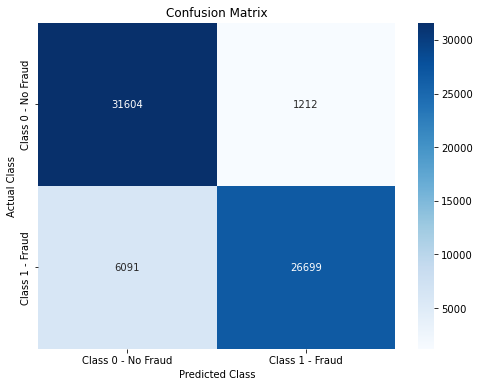

In [24]:
import seaborn as sns

array = df_encoded.values
X = X_train_smote
Y = y_train_smote
test_size = 0.33
seed = 6234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

print()

#matrix confusion
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

print()

#confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'], yticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## KNN

Accuracy: 99.313%

[[32366   450]
 [    1 32789]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     32816
         1.0       0.99      1.00      0.99     32790

    accuracy                           0.99     65606
   macro avg       0.99      0.99      0.99     65606
weighted avg       0.99      0.99      0.99     65606




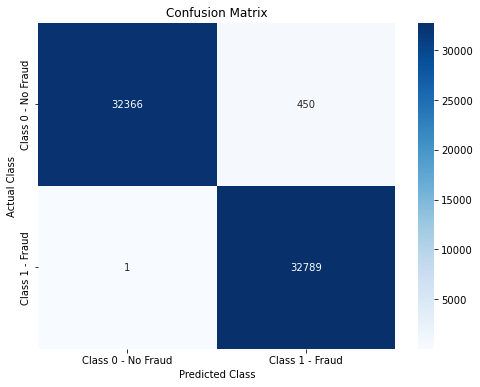

In [25]:
array = df_encoded.values
X = X_train_smote
Y = y_train_smote
test_size = 0.33
seed = 6234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print()

#matrix confusion
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

print()

#confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'], yticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Naive Bayes

Accuracy: 86.231%

[[30795  2021]
 [ 7012 25778]]
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     32816
         1.0       0.93      0.79      0.85     32790

    accuracy                           0.86     65606
   macro avg       0.87      0.86      0.86     65606
weighted avg       0.87      0.86      0.86     65606




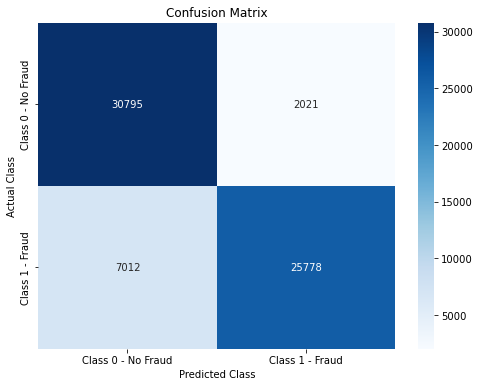

In [26]:
array = df_encoded.values
X = X_train_smote
Y =  y_train_smote
test_size = 0.33
seed = 6234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = GaussianNB()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print()

#matrix confusion
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

print()

#confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'], yticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Decision Trees

Accuracy: 97.576%

[[31751  1065]
 [  525 32265]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     32816
         1.0       0.97      0.98      0.98     32790

    accuracy                           0.98     65606
   macro avg       0.98      0.98      0.98     65606
weighted avg       0.98      0.98      0.98     65606




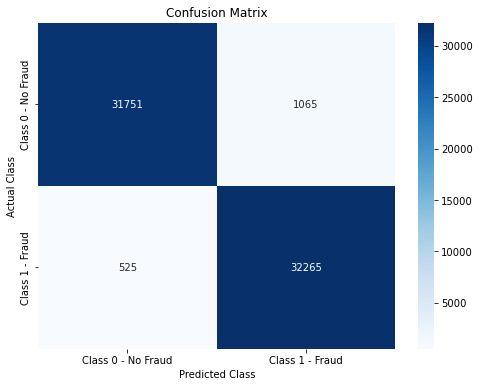

In [27]:
array = df_encoded.values
X = X_train_smote
Y = y_train_smote
test_size = 0.33
seed = 6234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print()

#matrix 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

print()

#confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'], yticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Support Vector Machines

In [ ]:
array = df_encoded.values
X = X_train_smote
Y = y_train_smote
test_size = 0.33
seed = 6234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = SVC()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
predicted = model.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print()

#matrix 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

print()

#confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'], yticklabels=['Class 0 - No Fraud', 'Class 1 - Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Compare Machine Learning Algorithms 

In [ ]:
array = df_encoded.values
X = X_train_smote
Y = y_train_smote
test_size = 0.33
seed = 6234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Train the model
    model.fit(X_train, Y_train)
    # Test accuracy
    result = model.score(X_test, Y_test)
    results.append([result])  # Wrapping result in a list to make it compatible with boxplot
    names.append(name)
    print(f"{name}: Accuracy: {result:.3f}")
    

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()